In [6]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context
import numpy as np
import warnings


DATA_PATH = 'GSE138266'
RANDOM_STATE = 42

In [7]:
adata = sc.read(DATA_PATH) # 5 patients and 5 control: PBMC + CSF cells
adata

AnnData object with n_obs × n_vars = 814177 × 33694
    obs: 'sample', 'patient', 'dataset', 'disease', 'cell_type', 'batch'
    var: 'gene_symbols', 'gene_ids'

In [8]:
# normalize data
#sc.pp.normalize_total(adata, target_sum=1e4)
#sc.pp.log1p(adata)

In [9]:
adata

AnnData object with n_obs × n_vars = 814177 × 33694
    obs: 'sample', 'patient', 'dataset', 'disease', 'cell_type', 'batch'
    var: 'gene_symbols', 'gene_ids'

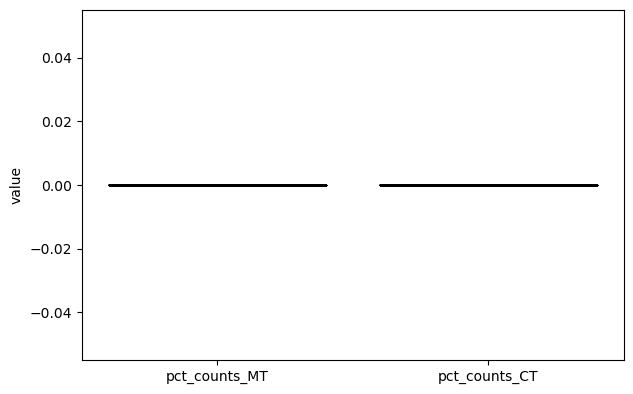

In [10]:
sc.pp.calculate_qc_metrics(adata, inplace=True)

adata.var['MT'] = adata.var_names.str.startswith('MT-') # annotate the group of mitochondrial genes as 'MT'
sc.pp.calculate_qc_metrics(adata, qc_vars=['MT'], inplace=True)

adata.var['CT'] = adata.var_names.str.startswith("CT-") # annotate the group of cell type genes as 'CT'
sc.pp.calculate_qc_metrics(adata, qc_vars=['CT'], inplace=True)

sc.pl.violin(adata, ['pct_counts_MT', 'pct_counts_CT'], jitter=0.4, multi_panel=False)

In [11]:
adata

AnnData object with n_obs × n_vars = 814177 × 33694
    obs: 'sample', 'patient', 'dataset', 'disease', 'cell_type', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'total_counts_CT', 'log1p_total_counts_CT', 'pct_counts_CT'
    var: 'gene_symbols', 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'MT', 'CT'

In [12]:
adata.var.describe()

,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
count,33694.000000,33694.000000,33694.000000,33694.000000,3.369400e+04,33694.000000
mean,2325.508280,0.009858,0.006799,99.714373,8.026431e+03,4.207264
std,7152.854522,0.147146,0.060378,0.878538,1.198030e+05,3.441202
min,0.000000,0.000000,0.000000,89.677306,0.000000e+00,0.000000
25%,1.000000,0.000001,0.000001,99.827587,1.000000e+00,0.693147
50%,50.000000,0.000064,0.000064,99.993859,5.200000e+01,3.970292
75%,1403.750000,0.001831,0.001830,99.999877,1.491000e+03,7.307873
max,84045.000000,15.638458,2.811717,100.000000,1.273247e+07,16.359667


In [13]:
adata.obs.describe()

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_MT,log1p_total_counts_MT,pct_counts_MT,total_counts_CT,log1p_total_counts_CT,pct_counts_CT
count,814177.000000,814177.000000,814177.000000,814177.000000,181210.000000,181210.000000,181210.000000,181210.000000,814177.0,814177.0,181210.0,814177.0,814177.0,181210.0
mean,96.239118,0.780795,332.166779,0.898908,77.446377,83.800036,88.185950,93.832454,0.0,0.0,0.0,0.0,0.0,0.0
std,324.704570,2.005104,1231.317871,2.355780,26.770735,19.662201,14.546813,8.139019,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,24.809077,32.860572,42.875846,60.004364,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,48.016016,63.757779,73.752951,86.389981,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.000000,0.000000,0.000000,0.000000,100.000000,100.000000,100.000000,100.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.000000,0.000000,0.000000,0.000000,100.000000,100.000000,100.000000,100.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,6582.000000,8.792246,59457.000000,10.993026,100.000000,100.000000,100.000000,100.000000,0.0,0.0,0.0,0.0,0.0,0.0


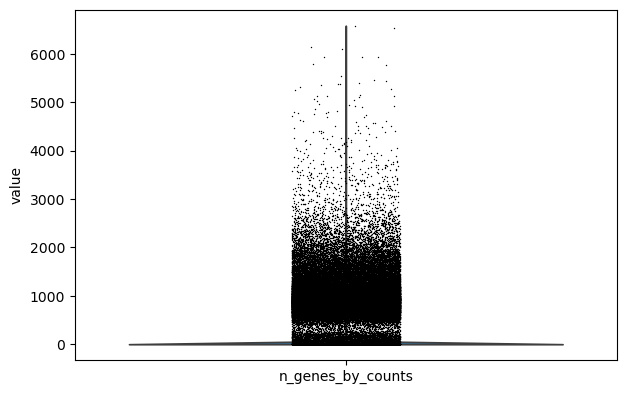

<module 'matplotlib.pyplot' from 'c:\\Users\\giuli\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [14]:
sc.pl.violin(adata, ['n_genes_by_counts'], jitter=0.1, multi_panel=False)
plt

In [15]:
adata[adata.obs['n_genes_by_counts'] < np.percentile(adata.obs['n_genes_by_counts'], 75), :]

View of AnnData object with n_obs × n_vars = 0 × 33694
    obs: 'sample', 'patient', 'dataset', 'disease', 'cell_type', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'total_counts_CT', 'log1p_total_counts_CT', 'pct_counts_CT'
    var: 'gene_symbols', 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'MT', 'CT'

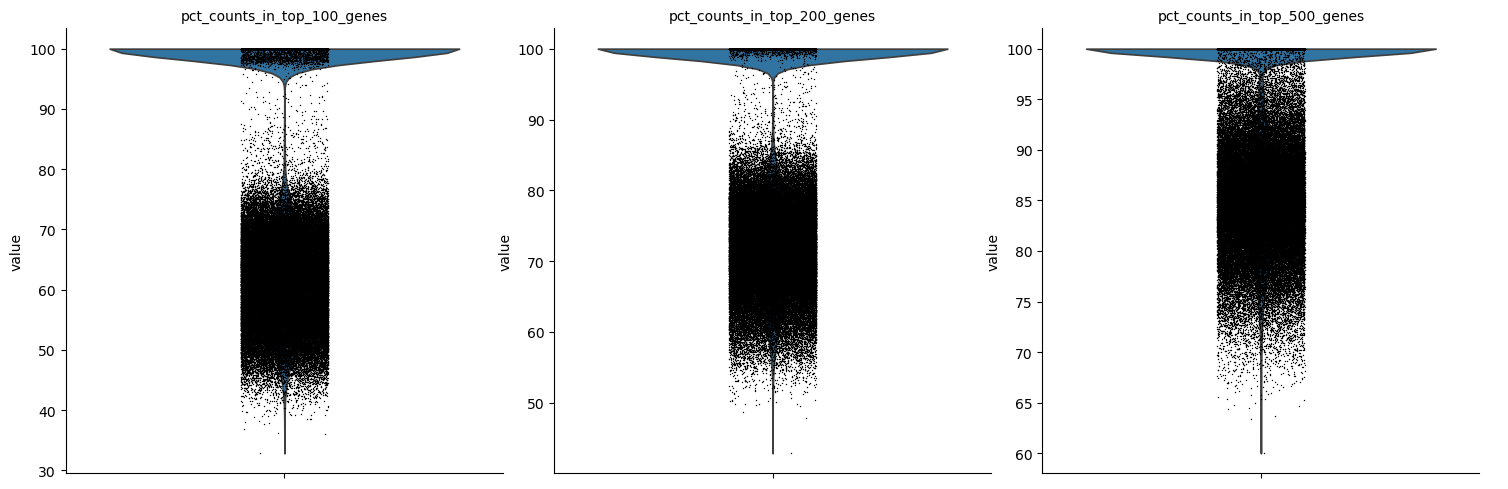

In [16]:
sc.pl.violin(adata, ['pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'],
    jitter=0.1, multi_panel=True)

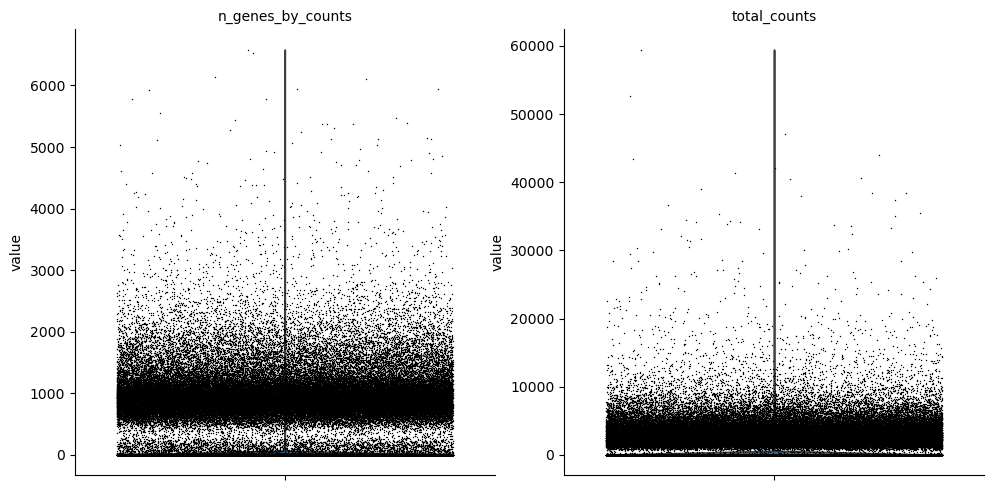

In [17]:
# visualize standard QC metrics
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'], jitter=0.4, multi_panel=True)


In [18]:
(adata.var['n_cells_by_counts'] == 0).sum() / adata.n_vars

0.22401614530776992

In [19]:
sum(adata.var['n_cells_by_counts'] > np.percentile(adata.var['n_cells_by_counts'], 50)) / adata.n_vars

0.49943610138303557

In [20]:
adata.obs[adata.obs['cell_type']=='CSF']

,sample,patient,dataset,disease,cell_type,batch,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_MT,log1p_total_counts_MT,pct_counts_MT,total_counts_CT,log1p_total_counts_CT,pct_counts_CT
AAACCTGAGTGGGCTA-1-MS19270-CSF,GSM4104122,MS19270,GSE138266,MS,CSF,0,651,6.480045,2566.0,7.850493,56.001559,73.577553,82.424006,94.115355,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGTGTTAGA-1-MS19270-CSF,GSM4104122,MS19270,GSE138266,MS,CSF,0,844,6.739337,2284.0,7.734121,43.301226,57.793345,69.658494,84.938704,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGGTCGCGTGT-1-MS19270-CSF,GSM4104122,MS19270,GSE138266,MS,CSF,0,3022,8.014005,17837.0,9.789086,40.079610,56.063239,67.718787,77.961541,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGGTCTCCACT-1-MS19270-CSF,GSM4104122,MS19270,GSE138266,MS,CSF,0,1058,6.965080,3721.0,8.222016,48.212846,64.633163,73.555496,85.004031,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGGTTTACTCT-1-MS19270-CSF,GSM4104122,MS19270,GSE138266,MS,CSF,0,1130,7.030857,3422.0,8.138272,43.629456,58.854471,68.848627,81.589714,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTATGCCATATGAGA-1-PTC85037-CSF,GSM4104133,PTC85037,GSE138266,PTC,CSF,0,725,6.587550,2608.0,7.866722,53.029141,69.938650,79.677914,91.372699,0.0,0.0,0.0,0.0,0.0,0.0
TTTATGCTCCAAGTAC-1-PTC85037-CSF,GSM4104133,PTC85037,GSE138266,PTC,CSF,0,976,6.884487,4644.0,8.443546,56.330749,75.172265,82.041344,89.750215,0.0,0.0,0.0,0.0,0.0,0.0
TTTGCGCCATTACGAC-1-PTC85037-CSF,GSM4104133,PTC85037,GSE138266,PTC,CSF,0,1223,7.109879,3444.0,8.144679,40.882695,54.907085,65.621370,79.006969,0.0,0.0,0.0,0.0,0.0,0.0
TTTGCGCGTCTCTTAT-1-PTC85037-CSF,GSM4104133,PTC85037,GSE138266,PTC,CSF,0,779,6.659294,2575.0,7.853993,49.087379,66.990291,77.281553,89.165049,0.0,0.0,0.0,0.0,0.0,0.0


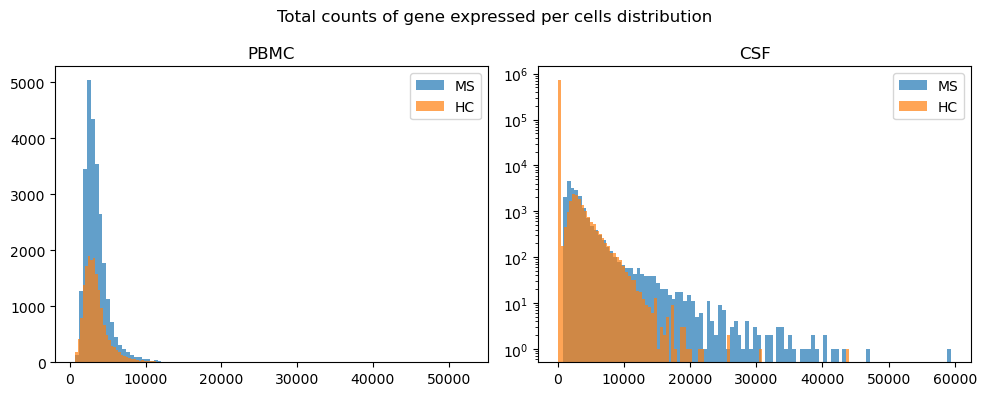

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].hist(adata.obs[(adata.obs['cell_type']=='PBMC') & (adata.obs['disease']=='MS')]['total_counts'], bins=100,
    alpha=0.7, log=False, label='MS')
axs[0].hist(adata.obs[(adata.obs['cell_type']=='PBMC') & (adata.obs['disease']!='MS')]['total_counts'], bins=100,
    alpha=0.7, log=False, label='HC')
axs[0].legend()
axs[0].set_title('PBMC')

axs[1].hist(adata.obs[(adata.obs['cell_type']=='CSF') & (adata.obs['disease']=='MS')]['total_counts'], bins=100,
    alpha=0.7, log=True, label='MS')
axs[1].hist(adata.obs[(adata.obs['cell_type']=='CSF') & (adata.obs['disease']!='MS')]['total_counts'], bins=100,
    alpha=0.7, log=True, label='HC')
axs[1].legend()
axs[1].set_title('CSF')

fig.set_tight_layout(True)
fig.suptitle('Total counts of gene expressed per cells distribution')
plt.show()

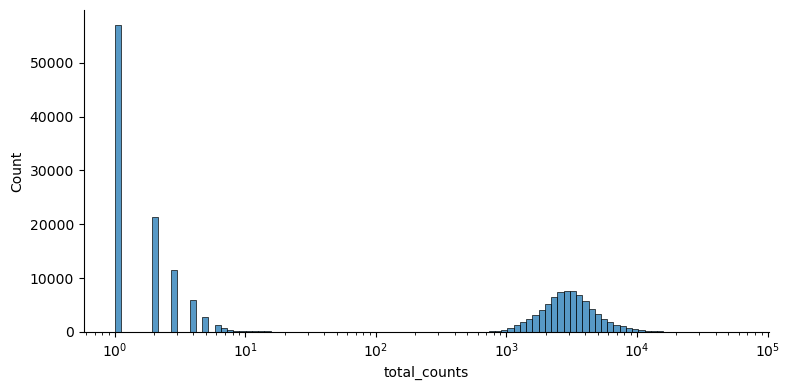

In [22]:
sns.displot(adata.obs['total_counts'], kind='hist', bins=100, log_scale=True, aspect=2, height=4)
# total counts per cell

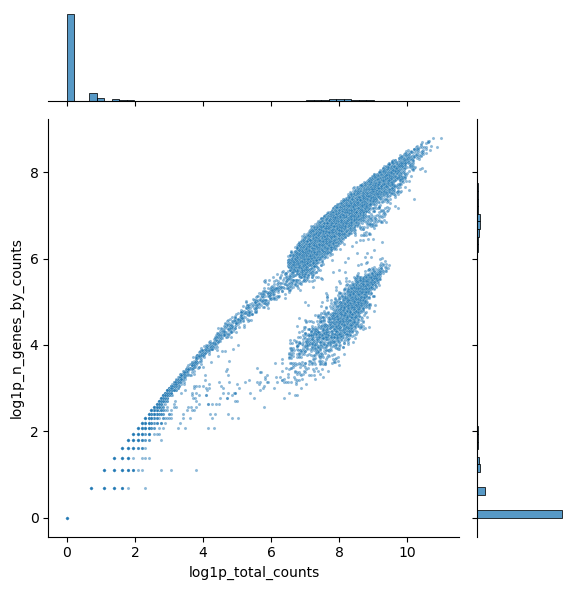

In [23]:
sns.jointplot(x='log1p_total_counts', y='log1p_n_genes_by_counts', data=adata.obs, kind='scatter', s=5, alpha=0.5,
    ratio=4, marginal_kws=dict(bins=50, fill=True));
# number of genes with at least 1 count in a cell vs sum of counts for a gene
# (in quante cellule è espresso un gene vs quanto è espresso in totale)

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_utils.py:465: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


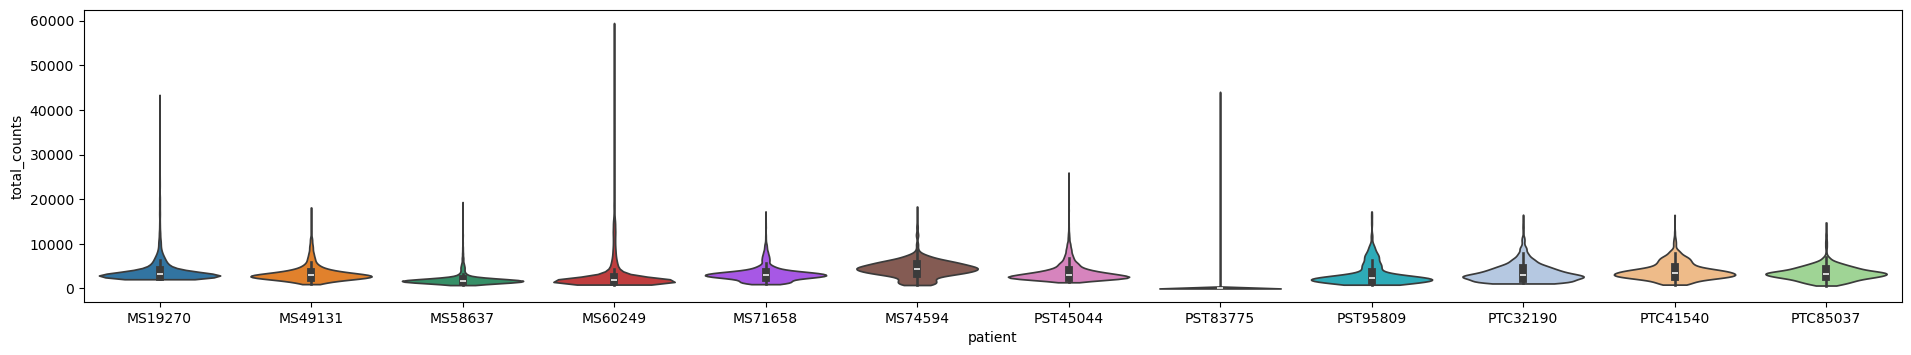

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_utils.py:465: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


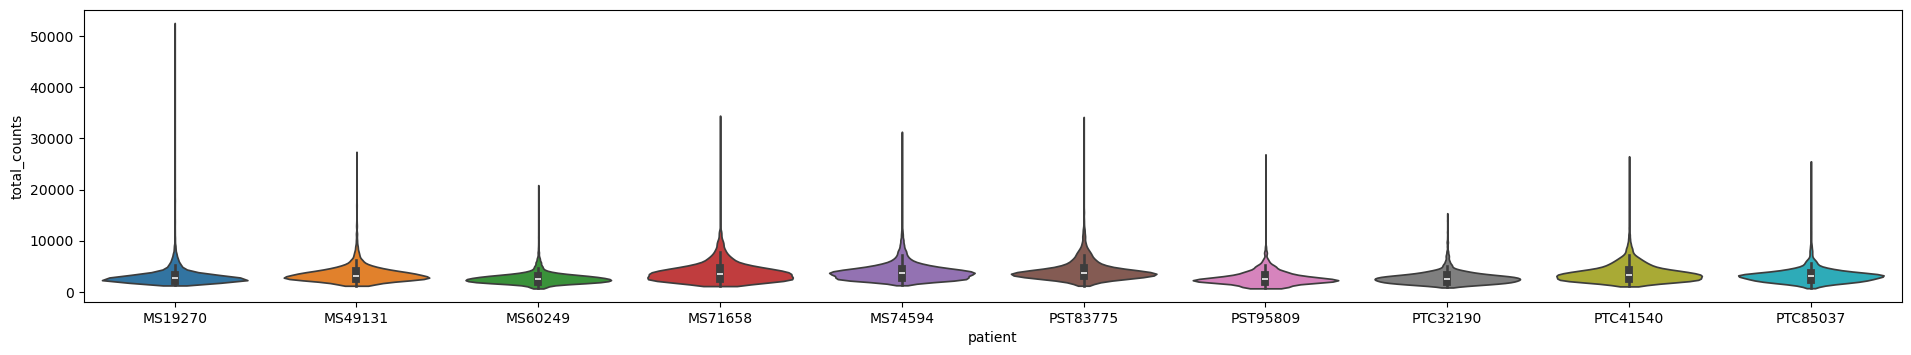

In [24]:
with rc_context({
    'figure.figsize': (18, 4),
    }):
    sc.pl.violin(
        adata[adata.obs['cell_type'] == 'CSF'],
        keys=['total_counts'],
        groupby='patient',
        stripplot=False,
        inner='box',
    );
    sc.pl.violin(
        adata[adata.obs['cell_type'] == 'PBMC'],
        keys=['total_counts'],
        groupby='patient',
        stripplot=False,
        inner='box',
    );

In [25]:
adata[adata.obs['patient'] == 'PST83775']

View of AnnData object with n_obs × n_vars = 741002 × 33694
    obs: 'sample', 'patient', 'dataset', 'disease', 'cell_type', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'total_counts_CT', 'log1p_total_counts_CT', 'pct_counts_CT'
    var: 'gene_symbols', 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'MT', 'CT'

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_utils.py:465: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


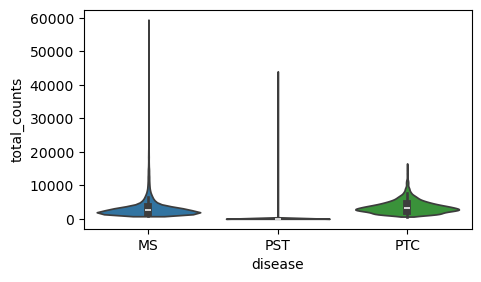

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_utils.py:465: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


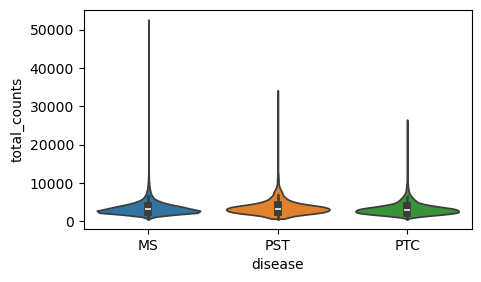

In [26]:
with rc_context({'figure.figsize': (5, 3)}):
    sc.pl.violin(
        adata[adata.obs['cell_type'] == 'CSF'],
        keys=['total_counts'],
        groupby='disease',
        stripplot=False,
        inner='box',
    )
    sc.pl.violin(
        adata[adata.obs['cell_type'] == 'PBMC'],
        keys=['total_counts'],
        groupby='disease', # MS (multiple sclerosis), PST () or PTC ()
        stripplot=False,
        inner='box',
    )

In [27]:
# create subsets
adata_pbmc_ms = adata[(adata.obs['cell_type']=='PBMC') & (adata.obs['disease']=='MS')]
adata_csf_ms = adata[(adata.obs['cell_type']=='CSF') & (adata.obs['disease']=='MS')]
adata_pbmc_pst = adata[(adata.obs['cell_type']=='PBMC')&(adata.obs['disease']=='PST')]
adata_csf_pst = adata[(adata.obs['cell_type']=='CSF')&(adata.obs['disease']=='PST')]#
adata_pbmc_ptc = adata[(adata.obs['cell_type']=='PBMC')&(adata.obs['disease']=='PTC')]
adata_csf_ptc = adata[(adata.obs['cell_type']=='CSF')&(adata.obs['disease']=='PTC')]

adatas_list = [adata_pbmc_ms, adata_csf_ms, adata_pbmc_pst, adata_pbmc_ptc, adata_csf_ptc]

In [28]:
adata[(adata.obs['cell_type']!='CSF')|(adata.obs['disease']!='PST')]

View of AnnData object with n_obs × n_vars = 68038 × 33694
    obs: 'sample', 'patient', 'dataset', 'disease', 'cell_type', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'total_counts_CT', 'log1p_total_counts_CT', 'pct_counts_CT'
    var: 'gene_symbols', 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'MT', 'CT'

In [29]:
814177 - adata_csf_pst.n_obs

68038

In [30]:
adata_csf_pst.n_obs

746139

In [31]:
for subset in adatas_list:
    print(subset.obs['disease'][0])
    print(subset.obs['cell_type'][0])
    print('Number of cells:', subset.n_obs)
    print('Number of genes:', subset.n_vars)
    print('\t')

MS
PBMC
Number of cells: 25831
Number of genes: 33694
	
MS
CSF
Number of cells: 19366
Number of genes: 33694
	
PST
PBMC
Number of cells: 5892
Number of genes: 33694
	
PTC
PBMC
Number of cells: 11246
Number of genes: 33694
	
PTC
CSF
Number of cells: 5703
Number of genes: 33694
	


C:\Users\giuli\AppData\Local\Temp\ipykernel_41668\1066120796.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(subset.obs['disease'][0])
C:\Users\giuli\AppData\Local\Temp\ipykernel_41668\1066120796.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(subset.obs['cell_type'][0])


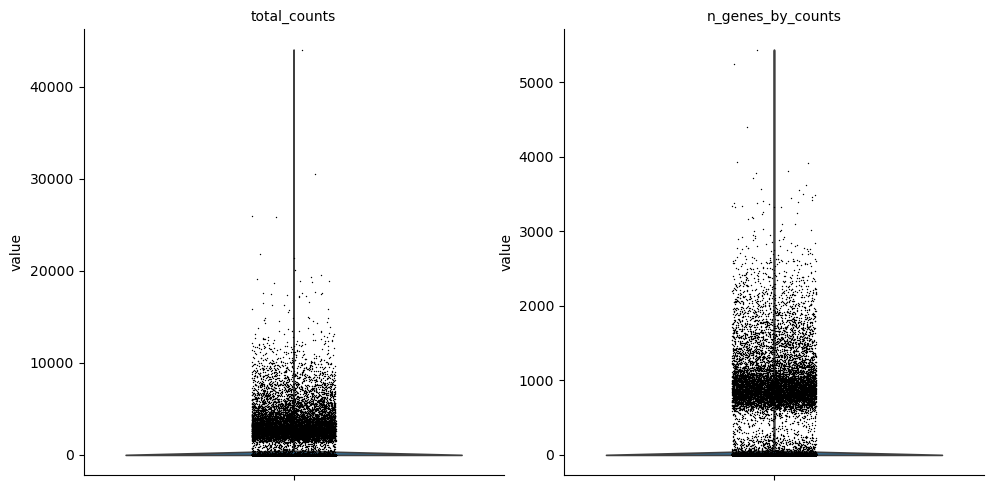

In [32]:
sc.pl.violin(adata_csf_pst, ['total_counts', 'n_genes_by_counts'], jitter=0.1, multi_panel=True)

In [33]:
adata_csf_pst

View of AnnData object with n_obs × n_vars = 746139 × 33694
    obs: 'sample', 'patient', 'dataset', 'disease', 'cell_type', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'total_counts_CT', 'log1p_total_counts_CT', 'pct_counts_CT'
    var: 'gene_symbols', 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'MT', 'CT'

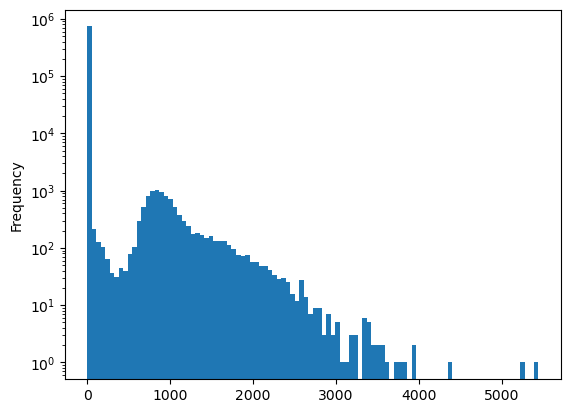

In [34]:
adata_csf_pst.obs['n_genes_by_counts'].plot(kind='hist', bins=100, log=True);

In [35]:
# remouve from the adata_csf_pst cells with less than 200 genes
adata_csf_pst_restricted = adata_csf_pst[adata_csf_pst.obs['n_genes_by_counts'] < 10]
adata_csf_pst_restricted = adata_csf_pst_restricted[adata_csf_pst_restricted.obs['total_counts'] < 10]
adata_csf_pst_restricted

View of AnnData object with n_obs × n_vars = 734261 × 33694
    obs: 'sample', 'patient', 'dataset', 'disease', 'cell_type', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'total_counts_CT', 'log1p_total_counts_CT', 'pct_counts_CT'
    var: 'gene_symbols', 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'MT', 'CT'

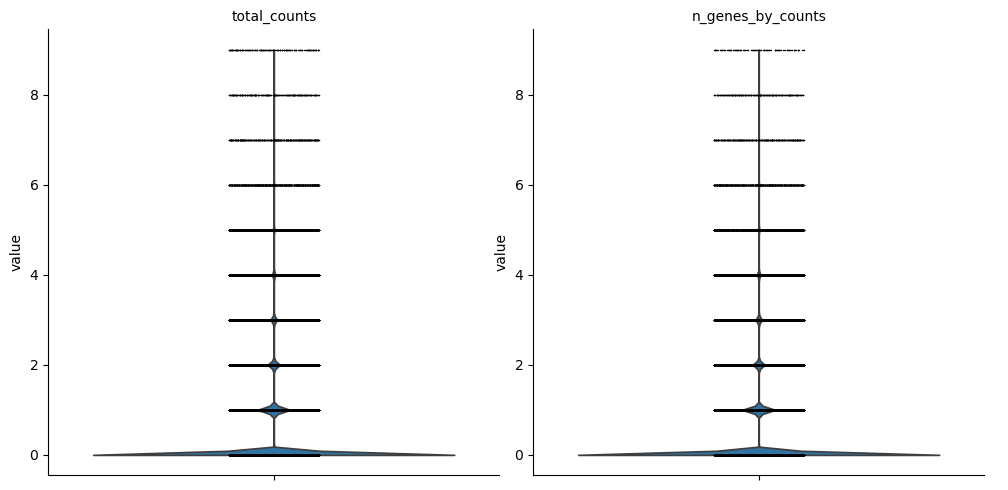

In [36]:
sc.pl.violin(adata_csf_pst_restricted, ['total_counts', 'n_genes_by_counts'], jitter=0.1, multi_panel=True)

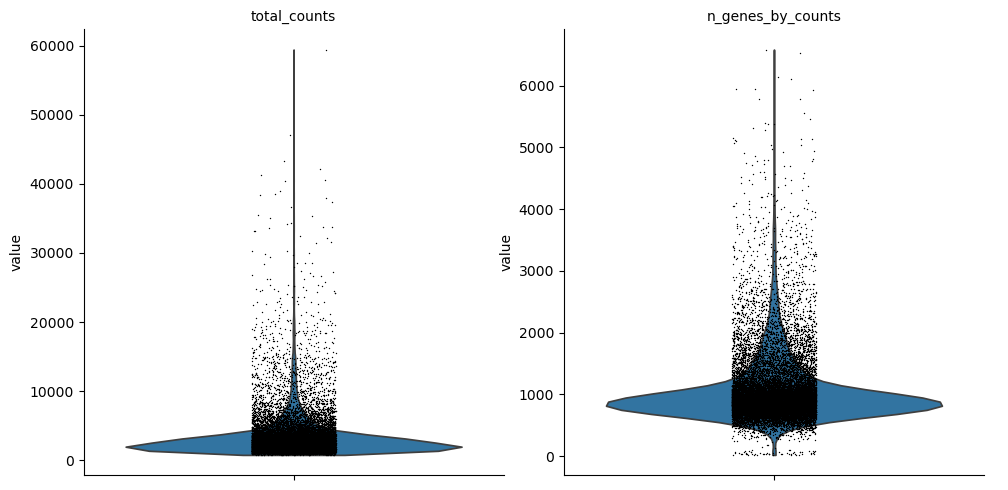

In [37]:
sc.pl.violin(adata_csf_ms, ['total_counts', 'n_genes_by_counts'], jitter=0.1, multi_panel=True)

In [38]:
def visulize_umap(adata, color=['batch', 'cell_types_labels'], ncols=1):
    sc.pl.umap(adata, color=color, ncols=ncols)

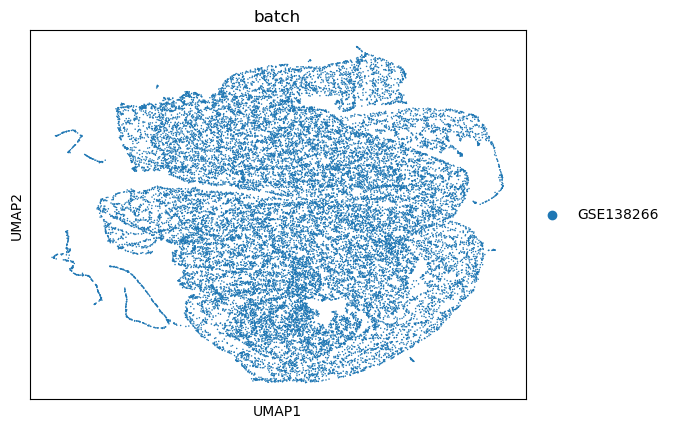

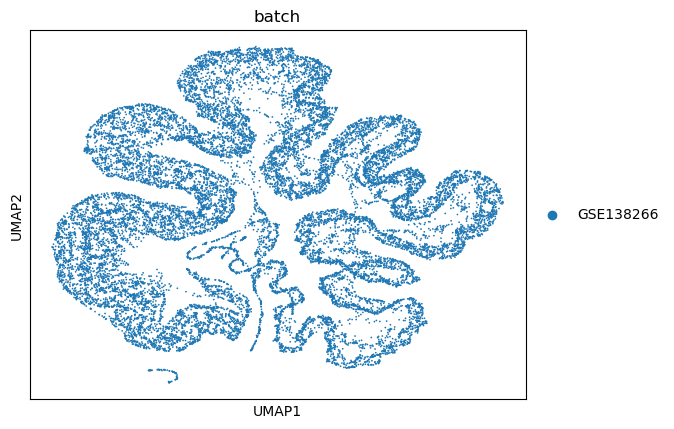

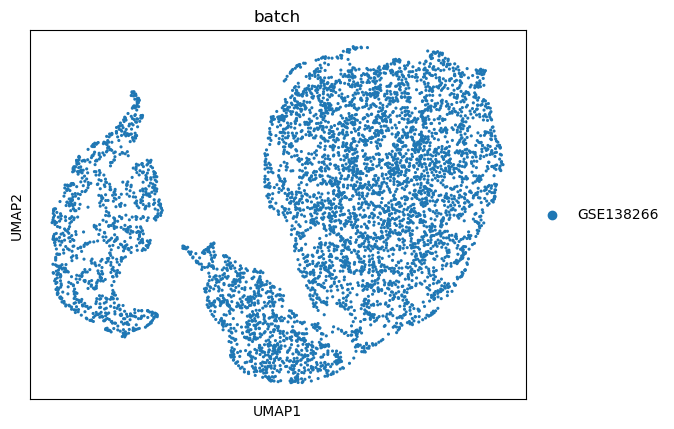

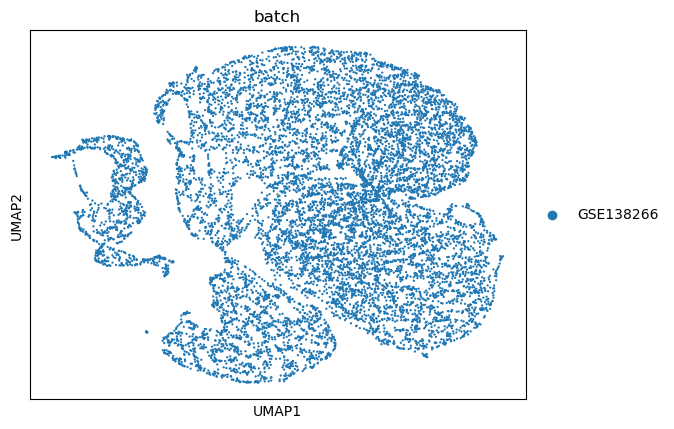

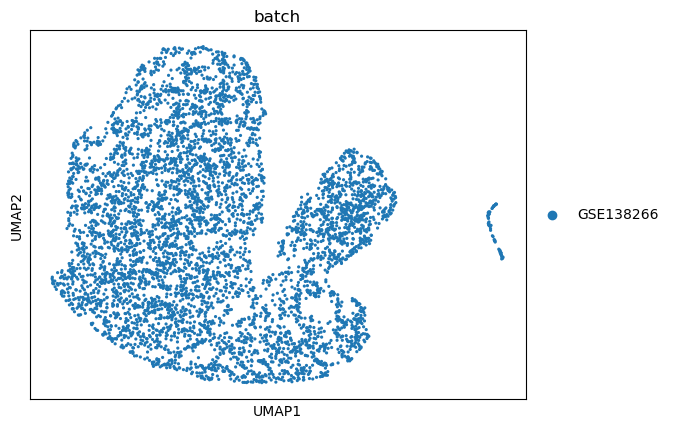

In [53]:
for adata_subset in adatas_list:
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        
        sc.tl.pca(
            adata_subset,
            svd_solver='arpack',
            n_comps=30,
            random_state=RANDOM_STATE
            )

        sc.pp.neighbors(
            adata_subset,
            n_neighbors=10,
            n_pcs=5,
            knn=True,
            metric='euclidean',
            random_state=RANDOM_STATE
            )

        sc.tl.umap(
            adata_subset,
            n_components=2, # number of dimensions of the UMAP embedding
            method='umap',
            random_state=RANDOM_STATE,
            )
        
        adata_subset.obs['batch'] = 'GSE138266'
        visulize_umap(adata_subset, color=['batch'], ncols=1)